In [22]:
import numpy as np
import pandas as pd
import sys
import os
import importlib
import shap

sys.path.append(os.path.abspath("../base"))
import classify
import features
pd.set_option("display.max_columns", None)
shap.initjs()

In [50]:
importlib.reload(classify)  # Reload the classify module
importlib.reload(features)

<module 'features' from '/Users/jevanchahal/dsc180b-capstone-q2/src/base/features.py'>

In [24]:
categories, consumer, acct, transactions = features.get_datasets()
transaction_categories = features.get_transaction_categories(transactions, categories)
all_features = features.one_hot_accounts(acct, consumer)

In [25]:
all_features = features.get_categorical_features2(
    all_features, transaction_categories, acct
)
all_features.to_csv("../../data/features.csv")

In [26]:
all_features = all_features.set_index('prism_consumer_id')
all_features.head()

,evaluation_date,credit_score,DQ_TARGET,account_type_401K,account_type_AUTO,account_type_BROKERAGE,account_type_CASH MANAGEMENT,account_type_CD,account_type_CHECKING,account_type_CONSUMER,account_type_CREDIT CARD,account_type_HOME EQUITY,account_type_HSA,account_type_IRA,account_type_LINE OF CREDIT,account_type_LOAN,account_type_MONEY MARKET,account_type_MONEYMARKET,account_type_MORTGAGE,account_type_OTHER,account_type_OVERDRAFT,account_type_PREPAID,account_type_RETIREMENT,account_type_ROTH,account_type_SAVINGS,account_type_STOCK PLAN,account_type_STUDENT,ACCOUNT_FEES_coef_variation,ATM_CASH_coef_variation,AUTOMOTIVE_coef_variation,AUTO_LOAN_coef_variation,BANKING_CATCH_ALL_coef_variation,BILLS_UTILITIES_coef_variation,BNPL_coef_variation,CHILD_DEPENDENTS_coef_variation,CORPORATE_PAYMENTS_coef_variation,CREDIT_CARD_PAYMENT_coef_variation,DEBT_coef_variation,DEPOSIT_coef_variation,EDUCATION_coef_variation,ENTERTAINMENT_coef_variation,ESSENTIAL_SERVICES_coef_variation,EXTERNAL_TRANSFER_coef_variation,FITNESS_coef_variation,FOOD_AND_BEVERAGES_coef_variation,GAMBLING_coef_variation,GENERAL_MERCHANDISE_coef_variation,GIFTS_DONATIONS_coef_variation,GOVERNMENT_SERVICES_coef_variation,GROCERIES_coef_variation,HEALTHCARE_MEDICAL_coef_variation,HOME_IMPROVEMENT_coef_variation,INSURANCE_coef_variation,INVESTMENT_coef_variation,INVESTMENT_INCOME_coef_variation,LEGAL_coef_variation,LOAN_coef_variation,MISCELLANEOUS_coef_variation,MORTGAGE_coef_variation,OTHER_BENEFITS_coef_variation,OVERDRAFT_coef_variation,PAYCHECK_coef_variation,PENSION_coef_variation,PETS_coef_variation,REFUND_coef_variation,RENT_coef_variation,RISK_CATCH_ALL_coef_variation,RTO_LTO_coef_variation,SELF_TRANSFER_coef_variation,TAX_coef_variation,TIME_OR_STUFF_coef_variation,TRANSPORATION_coef_variation,TRAVEL_coef_variation,UNEMPLOYMENT_BENEFITS_coef_variation,ACCOUNT_FEES_count,ATM_CASH_count,AUTOMOTIVE_count,AUTO_LOAN_count,BANKING_CATCH_ALL_count,BILLS_UTILITIES_count,BNPL_count,CHILD_DEPENDENTS_count,CORPORATE_PAYMENTS_count,CREDIT_CARD_PAYMENT_count,DEBT_count,DEPOSIT_count,EDUCATION_count,ENTERTAINMENT_count,ESSENTIAL_SERVICES_count,EXTERNAL_TRANSFER_count,FITNESS_count,FOOD_AND_BEVERAGES_count,GAMBLING_count,GENERAL_MERCHANDISE_count,GIFTS_DONATIONS_count,GOVERNMENT_SERVICES_count,GROCERIES_count,HEALTHCARE_MEDICAL_count,HOME_IMPROVEMENT_count,INSURANCE_count,INVESTMENT_count,INVESTMENT_INCOME_count,LEGAL_count,LOAN_count,MISCELLANEOUS_count,MORTGAGE_count,OTHER_BENEFITS_count,OVERDRAFT_count,PAYCHECK_count,PENSION_count,PETS_count,REFUND_count,RENT_count,RISK_CATCH_ALL_count,RTO_LTO_count,SELF_TRANSFER_count,TAX_count,TIME_OR_STUFF_count,TRANSPORATION_count,TRAVEL_count,UNEMPLOYMENT_BENEFITS_count,ACCOUNT_FEES_iqr,ATM_CASH_iqr,AUTOMOTIVE_iqr,AUTO_LOAN_iqr,BANKING_CATCH_ALL_iqr,BILLS_UTILITIES_iqr,BNPL_iqr,CHILD_DEPENDENTS_iqr,CORPORATE_PAYMENTS_iqr,CREDIT_CARD_PAYMENT_iqr,DEBT_iqr,DEPOSIT_iqr,EDUCATION_iqr,ENTERTAINMENT_iqr,ESSENTIAL_SERVICES_iqr,EXTERNAL_TRANSFER_iqr,FITNESS_iqr,FOOD_AND_BEVERAGES_iqr,GAMBLING_iqr,GENERAL_MERCHANDISE_iqr,GIFTS_DONATIONS_iqr,GOVERNMENT_SERVICES_iqr,GROCERIES_iqr,HEALTHCARE_MEDICAL_iqr,HOME_IMPROVEMENT_iqr,INSURANCE_iqr,INVESTMENT_iqr,INVESTMENT_INCOME_iqr,LEGAL_iqr,LOAN_iqr,MISCELLANEOUS_iqr,MORTGAGE_iqr,OTHER_BENEFITS_iqr,OVERDRAFT_iqr,PAYCHECK_iqr,PENSION_iqr,PETS_iqr,REFUND_iqr,RENT_iqr,RISK_CATCH_ALL_iqr,RTO_LTO_iqr,SELF_TRANSFER_iqr,TAX_iqr,TIME_OR_STUFF_iqr,TRANSPORATION_iqr,TRAVEL_iqr,UNEMPLOYMENT_BENEFITS_iqr,ACCOUNT_FEES_median,ATM_CASH_median,AUTOMOTIVE_median,AUTO_LOAN_median,BANKING_CATCH_ALL_median,BILLS_UTILITIES_median,BNPL_median,CHILD_DEPENDENTS_median,CORPORATE_PAYMENTS_median,CREDIT_CARD_PAYMENT_median,DEBT_median,DEPOSIT_median,EDUCATION_median,ENTERTAINMENT_median,ESSENTIAL_SERVICES_median,EXTERNAL_TRANSFER_median,FITNESS_median,FOOD_AND_BEVERAGES_median,GAMBLING_median,GENERAL_MERCHANDISE_median,GIFTS_DONATIONS_median,GOVERNMENT_SERVICES_median,GROCERIES_median,HEALTHCARE_MEDICAL_median,HOME_IMPROVEMENT_media


XGBoost Results
ROC-AUC: 0.839 | Accuracy: 0.910
Training Time: 2.2s | Predicting Time: 0.000003s
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      2416
         1.0       0.27      0.15      0.19       186

    accuracy                           0.91      2602
   macro avg       0.60      0.56      0.57      2602
weighted avg       0.89      0.91      0.90      2602



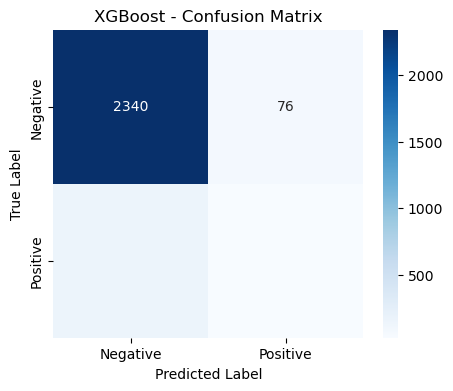

  0%|          | 0/10 [00:00<?, ?it/s]

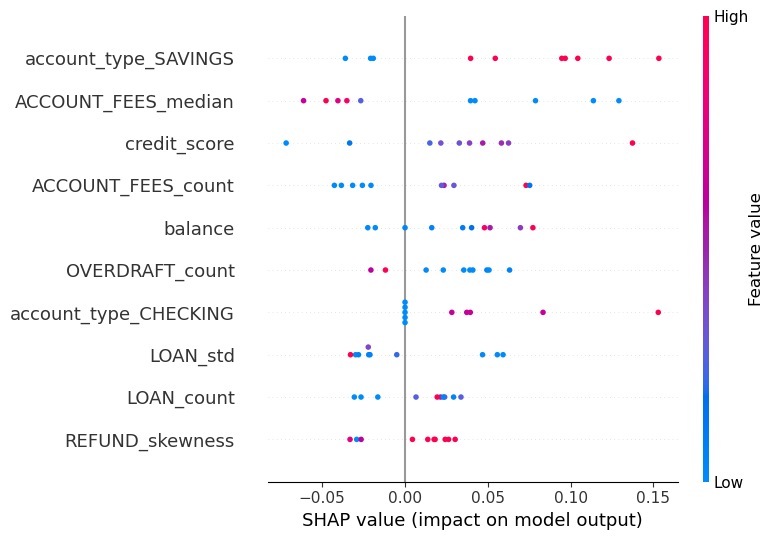


======================================== FINAL RESULTS ========================================
  model  roc_auc  accuracy  precision   recall  f1-score  train_time  predict_time
XGBoost 0.839279  0.910069   0.889033 0.910069  0.898105    2.161015      0.000003


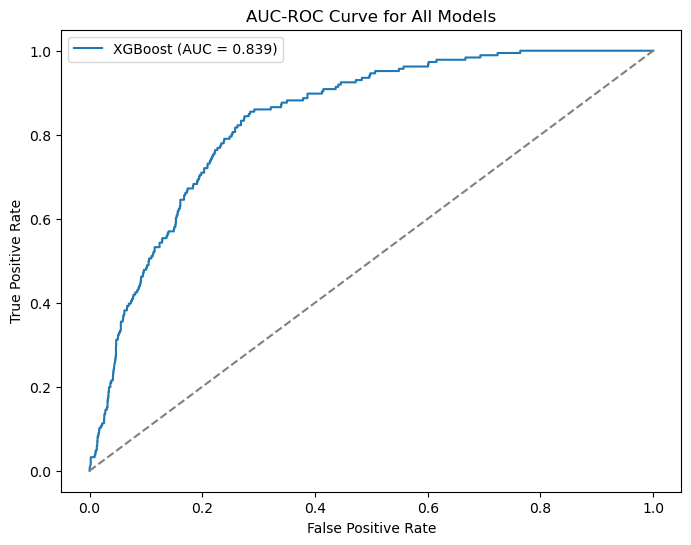

(None, 5)


In [51]:
classification_features = (all_features.drop(columns = ['evaluation_date', 'DQ_TARGET'])).columns
tup=classify.run_classification(classification_features, "DQ_TARGET", all_features, random_state = 3)
print(tup)

In [66]:
classify.run_classification_plotly(
    classification_features, "DQ_TARGET", all_features, random_state=3
)


Logistic Regression Results
ROC-AUC: 0.761 | Accuracy: 0.759
Training Time: 0.6s | Predicting Time: 0.000002s



Random Forest Results
ROC-AUC: 0.786 | Accuracy: 0.915
Training Time: 20.4s | Predicting Time: 0.000036s



LightGBM Results
ROC-AUC: 0.832 | Accuracy: 0.915
Training Time: 2.9s | Predicting Time: 0.000012s



Balanced RF Results
ROC-AUC: 0.805 | Accuracy: 0.919
Training Time: 25.9s | Predicting Time: 0.000036s



XGBoost Results
ROC-AUC: 0.839 | Accuracy: 0.910
Training Time: 4.4s | Predicting Time: 0.000008s



CatBoost Results
ROC-AUC: 0.823 | Accuracy: 0.915
Training Time: 33.4s | Predicting Time: 0.000010s



HistGB Results
ROC-AUC: 0.835 | Accuracy: 0.912
Training Time: 7.8s | Predicting Time: 0.000037s



RUSBoost Results
ROC-AUC: 0.806 | Accuracy: 0.826
Training Time: 23.2s | Predicting Time: 0.000033s


ValueError: 
    Invalid element(s) received for the 'color' property of parcoords.line
        Invalid elements include: ['XGBoost', 'HistGB', 'LightGBM', 'CatBoost', 'RUSBoost', 'Balanced RF', 'Random Forest', 'Logistic Regression']

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen
      - A number that will be interpreted as a color
        according to parcoords.line.colorscale
      - A list or array of any of the above

In [13]:
classification_features = (
    all_features.drop(columns=["prism_consumer_id", "evaluation_date", "DQ_TARGET"])
).columns
best_features = classify.get_best_features(classification_features, 'DQ_TARGET', all_features, n_features = 100)


Top Features (RandomForestClassifier):
                           Feature  Importance  Correlation
                      credit_score    0.071951    -0.249976
              account_type_SAVINGS    0.036733    -0.099071
                           balance    0.033870    -0.030563
                ACCOUNT_FEES_count    0.019624     0.020680
                  ACCOUNT_FEES_std    0.019338    -0.000036
               ACCOUNT_FEES_median    0.018523     0.001497
                  OVERDRAFT_median    0.017208     0.000407
                   OVERDRAFT_count    0.016646     0.066101
                     OVERDRAFT_std    0.013310     0.014445
                 SELF_TRANSFER_iqr    0.012234    -0.026766
                       BNPL_median    0.011610     0.011102
                       LOAN_median    0.011126     0.002615
                          LOAN_std    0.010011    -0.008751
                          BNPL_iqr    0.008668     0.009787
                        LOAN_count    0.008330     0.042468


In [11]:
pd.DataFrame(best_features[0]).T

,credit_score,balance,account_type_SAVINGS,ACCOUNT_FEES_count,ACCOUNT_FEES_median,OVERDRAFT_count,BNPL_count,BNPL_median,OVERDRAFT_median,ACCOUNT_FEES_std,SELF_TRANSFER_iqr,LOAN_median,BNPL_iqr,LOAN_count,OVERDRAFT_std,SELF_TRANSFER_count,BNPL_std,LOAN_std,BNPL_coef_variation,MISCELLANEOUS_median,ACCOUNT_FEES_coef_variation,INVESTMENT_INCOME_count,GENERAL_MERCHANDISE_count,ESSENTIAL_SERVICES_count,MISCELLANEOUS_count,ENTERTAINMENT_skewness,INSURANCE_count,ENTERTAINMENT_count,BNPL_skewness,DEPOSIT_median,AUTOMOTIVE_median,ESSENTIAL_SERVICES_std,ATM_CASH_coef_variation,account_type_CHECKING,ATM_CASH_median,GROCERIES_count,ATM_CASH_iqr,ATM_CASH_count,AUTOMOTIVE_skewness,MISCELLANEOUS_skewness,PAYCHECK_median,DEPOSIT_count,EXTERNAL_TRANSFER_skewness,ENTERTAINMENT_coef_variation,CREDIT_CARD_PAYMENT_coef_variation,ACCOUNT_FEES_mean,BNPL_mean,INVESTMENT_INCOME_std,REFUND_count,ESSENTIAL_SERVICES_median,LOAN_iqr,PAYCHECK_count,CREDIT_CARD_PAYMENT_count,FOOD_AND_BEVERAGES_count,EXTERNAL_TRANSFER_count,INVESTMENT_INCOME_median,ATM_CASH_std,HEALTHCARE_MEDICAL_count,CREDIT_CARD_PAYMENT_skewness,DEPOSIT_std,ACCOUNT_FEES_iqr,SELF_TRANSFER_std,GROCERIES_std,DEPOSIT_mean,AUTOMOTIVE_iqr,ESSENTIAL_SERVICES_skewness,MISCELLANEOUS_coef_variation,HOME_IMPROVEMENT_count,GROCERIES_median,EXTERNAL_TRANSFER_median,DEPOSIT_skewness,INSURANCE_median,ESSENTIAL_SERVICES_coef_variation,DEPOSIT_iqr,MISCELLANEOUS_std,ENTERTAINMENT_median,TRAVEL_count,TRANSPORATION_skewness,EXTERNAL_TRANSFER_iqr,GROCERIES_coef_variation,FOOD_AND_BEVERAGES_iqr,MISCELLANEOUS_iqr,FOOD_AND_BEVERAGES_skewness,PAYCHECK_std,REFUND_median,HEALTHCARE_MEDICAL_coef_variation,ENTERTAINMENT_mean,CREDIT_CARD_PAYMENT_median,GENERAL_MERCHANDISE_skewness,ACCOUNT_FEES_skewness,FOOD_AND_BEVERAGES_median,AUTO_LOAN_count,GROCERIES_skewness,TRANSPORATION_coef_variation,EXTERNAL_TRANSFER_coef_variation,LOAN_mean,EXTERNAL_TRANSFER_std,MISCELLANEOUS_mean,AUTOMOTIVE_std,REFUND_skewness
Feature,credit_score,balance,account_type_SAVINGS,ACCOUNT_FEES_count,ACCOUNT_FEES_median,OVERDRAFT_count,BNPL_count,BNPL_median,OVERDRAFT_median,ACCOUNT_FEES_std,SELF_TRANSFER_iqr,LOAN_median,BNPL_iqr,LOAN_count,OVERDRAFT_std,SELF_TRANSFER_count,BNPL_std,LOAN_std,BNPL_coef_variation,MISCELLANEOUS_median,ACCOUNT_FEES_coef_variation,INVESTMENT_INCOME_count,GENERAL_MERCHANDISE_count,ESSENTIAL_SERVICES_count,MISCELLANEOUS_count,ENTERTAINMENT_skewness,INSURANCE_count,ENTERTAINMENT_count,BNPL_skewness,DEPOSIT_median,AUTOMOTIVE_median,ESSENTIAL_SERVICES_std,ATM_CASH_coef_variation,account_type_CHECKING,ATM_CASH_median,GROCERIES_count,ATM_CASH_iqr,ATM_CASH_count,AUTOMOTIVE_skewness,MISCELLANEOUS_skewness,PAYCHECK_median,DEPOSIT_count,EXTERNAL_TRANSFER_skewness,ENTERTAINMENT_coef_variation,CREDIT_CARD_PAYMENT_coef_variation,ACCOUNT_FEES_mean,BNPL_mean,INVESTMENT_INCOME_std,REFUND_count,ESSENTIAL_SERVICES_median,LOAN_iqr,PAYCHECK_count,CREDIT_CARD_PAYMENT_count,FOOD_AND_BEVERAGES_count,EXTERNAL_TRANSFER_count,INVESTMENT_INCOME_median,ATM_CASH_std,HEALTHCARE_MEDICAL_count,CREDIT_CARD_PAYMENT_skewness,DEPOSIT_std,ACCOUNT_FEES_iqr,SELF_TRANSFER_std,GROCERIES_std,DEPOSIT_mean,AUTOMOTIVE_iqr,ESSENTIAL_SERVICES_skewness,MISCELLANEOUS_coef_variation,HOME_IMPROVEMENT_count,GROCERIES_median,EXTERNAL_TRANSFER_median,DEPOSIT_skewness,INSURANCE_median,ESSENTIAL_SERVICES_coef_variation,DEPOSIT_iqr,MISCELLANEOUS_std,ENTERTAINMENT_median,TRAVEL_count,TRANSPORATION_skewness,EXTERNAL_TRANSFER_iqr,GROCERIES_coef_variation,FOOD_AND_BEVERAGES_iqr,MISCELLANEOUS_iqr,FOOD_AND_BEVERAGES_skewness,PAYCHECK_std,REFUND_median,HEALTHCARE_MEDICAL_coef_variation,ENTERTAINMENT_mean,CREDIT_CARD_PAYMENT_median,GENERAL_MERCHANDISE_skewness,ACCOUNT_FEES_skewness,FOOD_AND_BEVERAGES_median,AUTO_LOAN_count,GROCERIES_skewness,TRANSPORATION_coef_variation,EXTERNAL_TRANSFER_coef_variation,LOAN_mean,EXTERNAL_TRANSFER_std,MISCELLANEOUS_mean,AUTOMOTIVE_std,REFUND_skewness



Logistic Regression Results
ROC-AUC: 0.778 | Accuracy: 0.742
Training Time: 0.4s
              precision    recall  f1-score   support

         0.0       0.97      0.74      0.84      2416
         1.0       0.18      0.71      0.28       186

    accuracy                           0.74      2602
   macro avg       0.57      0.73      0.56      2602
weighted avg       0.91      0.74      0.80      2602


Random Forest Results
ROC-AUC: 0.789 | Accuracy: 0.911
Training Time: 16.2s
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      2416
         1.0       0.26      0.13      0.18       186

    accuracy                           0.91      2602
   macro avg       0.60      0.55      0.57      2602
weighted avg       0.89      0.91      0.90      2602

[LightGBM] [Info] Number of positive: 9624, number of negative: 9624
[LightGBM] [Info] Total Bins 25011
[LightGBM] [Info] Number of data points in the train set: 19248, number of used fea

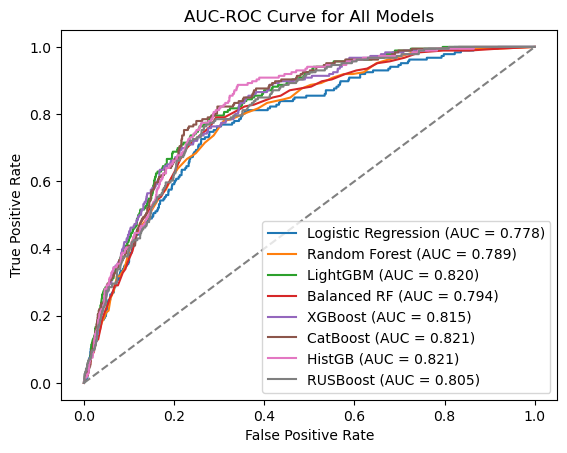

In [23]:
classify.run_classification(best_features[0], "DQ_TARGET", all_features)



Logistic Regression Results
ROC-AUC: 0.777 | Accuracy: 0.726
Training Time: 0.1s
              precision    recall  f1-score   support

         0.0       0.97      0.73      0.83      2416
         1.0       0.17      0.70      0.27       186

    accuracy                           0.73      2602
   macro avg       0.57      0.72      0.55      2602
weighted avg       0.91      0.73      0.79      2602


Random Forest Results
ROC-AUC: 0.799 | Accuracy: 0.908
Training Time: 6.6s
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      2416
         1.0       0.23      0.12      0.16       186

    accuracy                           0.91      2602
   macro avg       0.58      0.55      0.56      2602
weighted avg       0.88      0.91      0.89      2602

[LightGBM] [Info] Number of positive: 9561, number of negative: 9561
[LightGBM] [Info] Total Bins 11635
[LightGBM] [Info] Number of data points in the train set: 19122, number of used feat

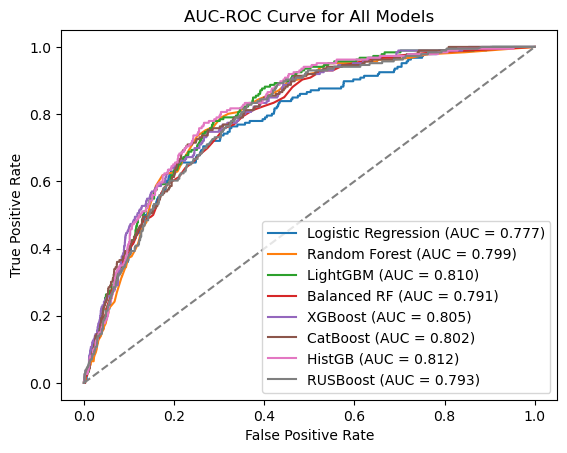

In [67]:
classify.run_classification(best_features[2], "DQ_TARGET", all_features)
